In [1]:
# %matplotlib widget
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.sans-serif"] = ["Kaiti SC", "Menlo"] # 设置字体

In [ ]:
填充两条水平曲线之间的区域

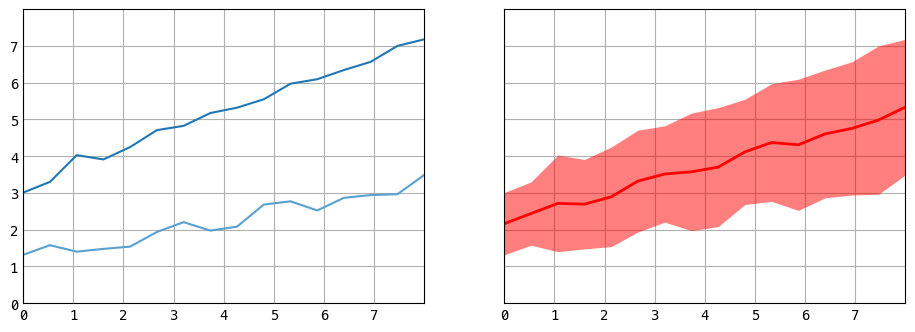

In [37]:
x = np.linspace(0, 8, 16)
y1 = 3 + 4 * x / 8 + np.random.uniform(0.0, 0.5, len(x))
y2 = 1 + 2 * x / 8 + np.random.uniform(0.0, 0.5, len(x))

_, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 3))
ax1.plot(x, y1)
ax1.plot(x, y2)
ax1.set(xlim=(0, 8), xticks=np.arange(0, 8), ylim=(0, 8), yticks=np.arange(0, 8))

ax2.fill_between(x, y1, y2, color="red", alpha=0.5, linewidth=0)
ax2.plot(x, (y1 + y2) / 2, color="red", linewidth=2)
ax2.set(xlim=(0, 8), xticks=np.arange(0, 8))

plt.show()

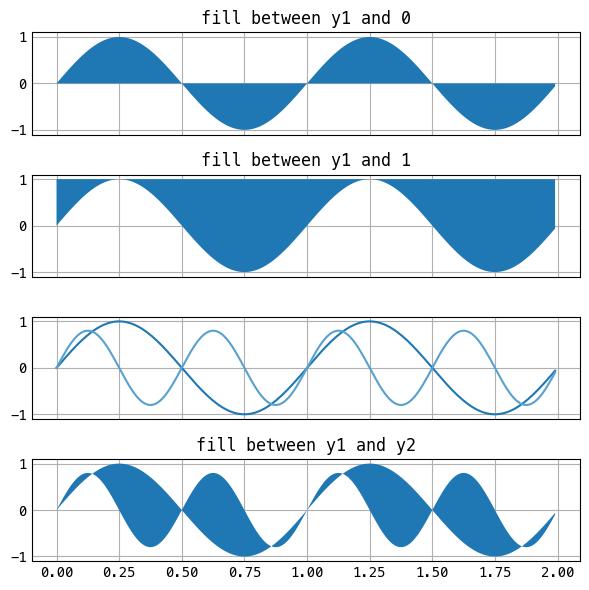

In [45]:
x = np.arange(0., 2., 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 0.8 * np.sin(4 * np.pi * x)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(6, 6))
ax1.fill_between(x, y1)
ax1.set(title="fill between y1 and 0")

ax2.fill_between(x, y1, 1)
ax2.set(title="fill between y1 and 1")


ax3.plot(x, y1)
ax3.plot(x, y2)

ax4.fill_between(x, y1, y2)
ax4.set(title="fill between y1 and y2")


fig.tight_layout()
plt.show()

### 置信区间带

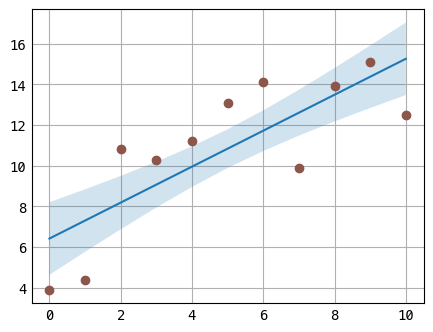

In [53]:
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]
a, b = np.polyfit(x, y, deg=1) # y = ax+b
y_est = a * x + b

y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')
plt.show()

选择性填充
`where`

The parameter where allows to specify the x-ranges to fill. It's a boolean array with the same size as x.

Only x-ranges of contiguous True sequences are filled. As a result the range between neighboring True and False values is never filled. This often undesired when the data points should represent a contiguous quantity. It is therefore recommended to set interpolate=True unless the x-distance of the data points is fine enough so that the above effect is not noticeable. Interpolation approximates the actual x position at which the where condition will change and extends the filling up to there.

参数 where 允许指定要填充的 x ​​范围。它是一个布尔数组，大小与 x 相同。

仅填充连续 True 序列的 x 范围。因此，相邻 True 和 False 值之间的范围永远不会被填充。当数据点应该表示连续的量时，这通常是不希望出现的。因此，建议设置 interpolate=True，除非数据点的 x 距离足够精细，以至于上述效果不明显。插值会近似计算 where 条件发生变化的实际 x 位置，并将填充范围扩展到该位置。

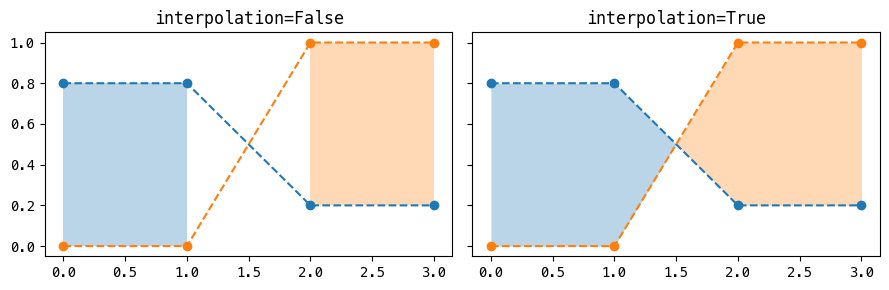

In [12]:
x = np.array([0, 1, 2, 3])
y1 = np.array([0.8, 0.8, 0.2, 0.2])
y2 = np.array([0, 0, 1, 1])

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(9, 3))

ax1.set_title('interpolation=False')
ax1.plot(x, y1, 'o--')
ax1.plot(x, y2, 'o--')
ax1.fill_between(x, y1, y2, where=y1 > y2, color="C0", alpha=0.3, linewidth=0)
ax1.fill_between(x, y1, y2, where=y1 < y2, color="C1", alpha=0.3, linewidth=0)

ax2.set_title('interpolation=True')
ax2.plot(x, y1, 'o--')
ax2.plot(x, y2, 'o--')
ax2.fill_between(x, y1, y2, where=y1 > y2, color="C0", alpha=0.3, linewidth=0, interpolate=True)
ax2.fill_between(x, y1, y2, where=y1 < y2, color="C1", alpha=0.3, linewidth=0, interpolate=True)

fig.tight_layout()
plt.show()